In [1]:
#negligably small change
import tweepy
import pandas as pd    
import numpy as np

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Natha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from credentials import *

In [4]:
def twitter_setup():
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth)
    return api

In [7]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=1000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:200]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

“Trump did a deal with Japan. A lot of our product goes to Japan, and we are booming in North Dakota.” Jim on C Spa… https://t.co/U0th7LKMyz

RT @WhiteHouse: In response to the virus, the American people have launched the greatest mobilization of our society since World War II. 🇺🇸…

RT @WhiteHouse: This Sunday, millions of Christians will celebrate Easter. 

"At this holy time, we pray that God will heal the sick and co…

RT @WhiteHouse: The data is clear: Our collective national effort is saving many lives. Keep up the fight! https://t.co/MMk1BpwDpg

RT @WhiteHouse: LIVE: Press Briefing with Coronavirus Task Force https://t.co/OtJWAa9yHo

https://t.co/HGD0GHUOjt

Nobody wants to say that if Elizabeth Warren gets out of the race before Super Tuesday, Crazy Bernie Sanders wins v… https://t.co/NRcJmZAXLG

RT @trish_regan: AG #Barr says he believes #Russia investigation into #PresTrump was started without basis &amp; effectively amounted

In [8]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

data.shape

,Tweets
0,“Trump did a deal with Japan. A lot of our pro...
1,"RT @WhiteHouse: In response to the virus, the ..."
2,"RT @WhiteHouse: This Sunday, millions of Chris..."
3,RT @WhiteHouse: The data is clear: Our collect...
4,RT @WhiteHouse: LIVE: Press Briefing with Coro...
5,https://t.co/HGD0GHUOjt
6,Nobody wants to say that if Elizabeth Warren g...
7,RT @trish_regan: AG #Barr says he believes #Ru...
8,RT @TomFitton: AG William Barr says Russia pro...
9,RT @brithume: Barr on the right track here. Mo...


(200, 1)

In [10]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [11]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1248716255001030656
2020-04-10 20:55:29
Twitter for iPhone
0
5323
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [3, 14]}], 'urls': []}


In [35]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [39]:
import random
market_movement = []
for i in range(0, 200):
    rand = random.randint(-1, 1)
    market_movement.append(rand)

data["Market Movement"] = market_movement
data = data.drop(columns = ["Market_Movement"])

In [40]:
mean = np.mean(data['len'])





In [41]:
print("The average tweet length is: {}".format(mean))

The average tweet length is: 110.505


In [42]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
The W.H.O. really blew it. For some reason, funded largely by the United States, yet very China centric. We will be… https://t.co/3C2NWDafia
Number of likes: 464464
140 characters.

The tweet with more retweets is: 
The W.H.O. really blew it. For some reason, funded largely by the United States, yet very China centric. We will be… https://t.co/3C2NWDafia
Number of retweets: 113905
140 characters.



In [43]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

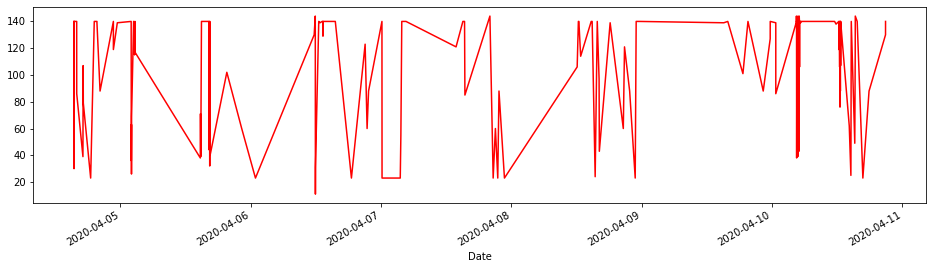

In [44]:
tlen.plot(figsize=(16,4), color='r');

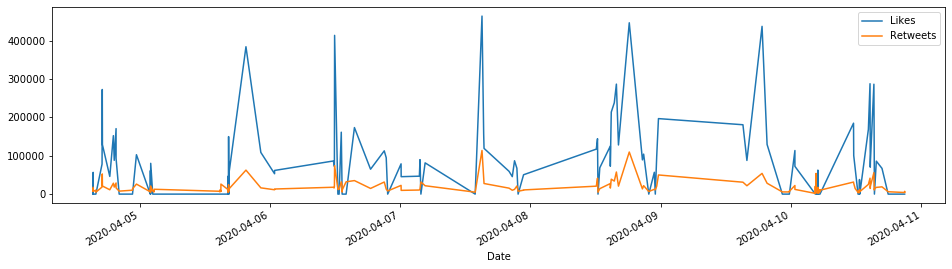

In [45]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [46]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [47]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

In [48]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Market Movement,SA
0,"RT @WhiteHouse: In response to the virus, the ...",140,1248716255001030656,2020-04-10 20:55:29,Twitter for iPhone,0,5323,0,1
1,"RT @WhiteHouse: This Sunday, millions of Chris...",140,1248716218867101696,2020-04-10 20:55:21,Twitter for iPhone,0,7271,-1,-1
2,RT @WhiteHouse: The data is clear: Our collect...,130,1248716207311773702,2020-04-10 20:55:18,Twitter for iPhone,0,4199,1,1
3,RT @WhiteHouse: LIVE: Press Briefing with Coro...,88,1248670360507121665,2020-04-10 17:53:07,Twitter for iPhone,0,6191,-1,1
4,https://t.co/HGD0GHUOjt,23,1248653185969016833,2020-04-10 16:44:53,Twitter for iPhone,67151,18949,-1,0
5,Nobody wants to say that if Elizabeth Warren g...,140,1248637403893583872,2020-04-10 15:42:10,Twitter for iPhone,86022,17562,1,1
6,RT @trish_regan: AG #Barr says he believes #Ru...,144,1248632106135273473,2020-04-10 15:21:07,Twitter for iPhone,0,14446,1,1
7,RT @TomFitton: AG William Barr says Russia pro...,140,1248632037839450113,2020-04-10 15:20:50,Twitter for iPhone,0,12175,0,0
8,RT @brithume: Barr on the right track here. Mo...,115,1248631911456616448,2020-04-10 15:20:20,Twitter for iPhone,0,10654,0,1
9,The Invisible Enemy will soon be in full retreat!,49,1248630671754563585,2020-04-10 15:15:25,Twitter for iPhone,286708,55935,1,1


In [33]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [34]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.0%
Percentage of neutral tweets: 35.0%
Percentage de negative tweets: 15.0%


In [49]:
data.to_csv ('Resources\Trump_Tweet_Data.csv', index = False, header=True)